Found 153 files


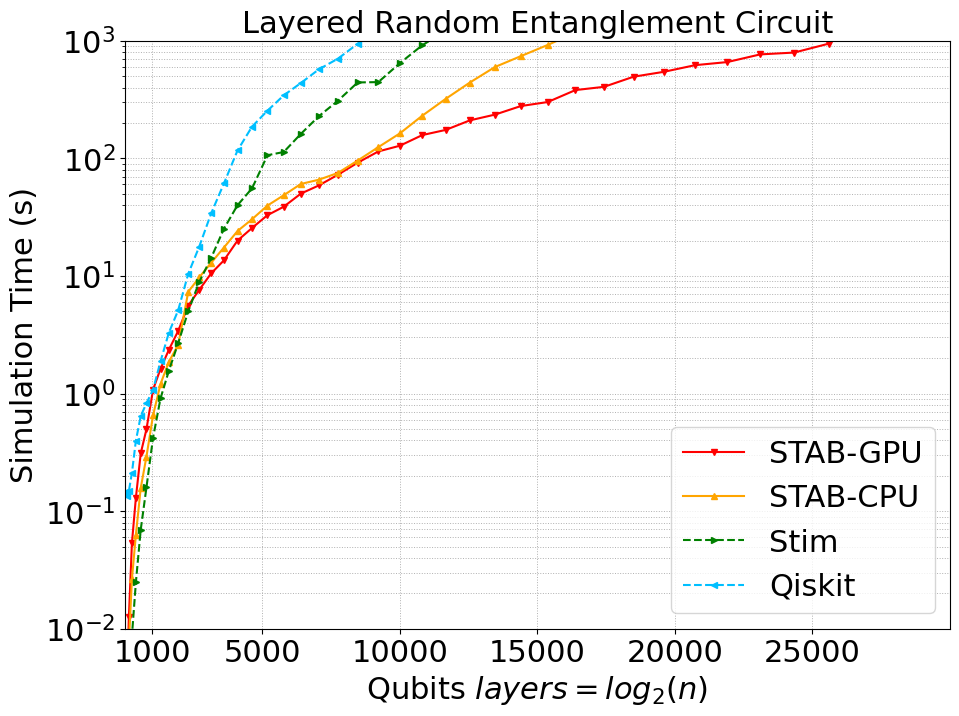

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt

def read_and_label_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    labels = ["sim_name", "sim_time", "n_qubits"]
    data = {labels[i]: lines[i].strip() if i == 0 else float(lines[i]) for i in range(len(lines))}
    
    return data

def process_folder(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"): 
            filepath = os.path.join(folder_path, filename)
            data = read_and_label_file(filepath)
            all_data.append(data)
    
    return all_data

def plot_data(all_data):
    sim_times_nvgpu = []
    sim_times_cpu = []
    sim_times_stim = []
    sim_times_cirq = []
    sim_times_qiskit = []
    n_qubits_nvgpu = []
    n_qubits_cpu = []
    n_qubits_stim = []
    n_qubits_cirq = []
    n_qubits_qiskit = []

    for data in all_data:
        if data["sim_name"] == "nvgpu":
            n_qubits_nvgpu.append(float(data["n_qubits"]))
            sim_times_nvgpu.append(float(data["sim_time"]))
        elif data["sim_name"] == "cpu":
            n_qubits_cpu.append(float(data["n_qubits"]))
            sim_times_cpu.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim":
            n_qubits_stim.append(float(data["n_qubits"]))
            sim_times_stim.append(float(data["sim_time"]))
        elif data["sim_name"] == "qiskit":
            n_qubits_qiskit.append(float(data["n_qubits"]))
            sim_times_qiskit.append(float(data["sim_time"]))



    n_qubits_nvgpu, sim_times_nvgpu = zip(*sorted(zip(n_qubits_nvgpu, sim_times_nvgpu))) if n_qubits_nvgpu else ([], [])
    n_qubits_cpu, sim_times_cpu = zip(*sorted(zip(n_qubits_cpu, sim_times_cpu))) if n_qubits_cpu else ([], [])

    n_qubits_stim, sim_times_stim = zip(*sorted(zip(n_qubits_stim, sim_times_stim))) if n_qubits_stim else ([], [])
    n_qubits_qiskit, sim_times_qiskit = zip(*sorted(zip(n_qubits_qiskit, sim_times_qiskit))) if n_qubits_qiskit else ([], [])


    plt.figure(figsize=(10, 7))

    plt.plot(n_qubits_nvgpu, sim_times_nvgpu, "v-",label="STAB-GPU", color="red", markersize=5)
    plt.plot(n_qubits_cpu, sim_times_cpu, "^-",label="STAB-CPU", color="orange", markersize=5)

    plt.plot(n_qubits_stim, sim_times_stim, ">--", label="Stim", color="green", markersize=5)
    plt.plot(n_qubits_qiskit, sim_times_qiskit, "<--", label="Qiskit", color="deepskyblue", markersize=5)


    plt.xlabel(r"Qubits $layers=log_{2}(n)$", fontsize=22)
    plt.ylabel("Simulation Time (s)", fontsize=22)
        # Increase font size for ticks
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    # plt.xscale("log", base=2) 
    # plt.yscale("log", base=10)

    plt.ylim(0.01, 1000)
    plt.xlim(0, 30000)
    plt.xticks([1000, 5000, 10000, 15000, 20000, 25000])
    plt.title("Layered Random Entanglement Circuit",fontsize=22)
    plt.legend(fontsize=22)
    plt.grid(True, linestyle=":", linewidth=0.7, which="both")

    plt.legend(fontsize=22)
    plt.subplots_adjust(top=0.95, right=0.95)

    # Save the plot as a PDF
    plt.savefig("graphics/random_plot.pdf", format="pdf")

    plt.show()


folder_path = "sim_bench"  
all_data = process_folder(folder_path)

print(f"Found {len(all_data)} files")

if not all_data:
    print("No data found.")

plot_data(all_data)

Found 126 files


/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_24682/1489377952.py:50: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bs--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(n_qubits_nvgpu2D, sim_times_nvgpu2D, "bs--", label="Stab-GPU-2D (full layers)", linestyle="-", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_24682/1489377952.py:51: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g^-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(n_qubits_stim2D, sim_times_stim2D, "g^-", label="Stim (full layers)", linestyle="--", markersize=5)


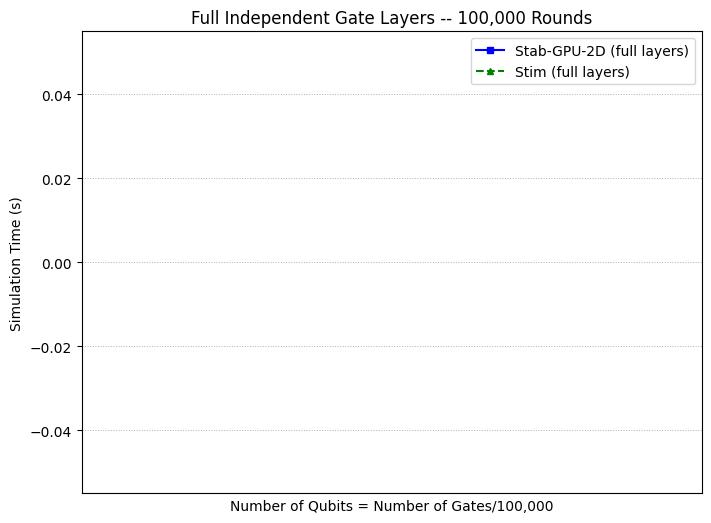

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import stim
import cirq

def read_and_label_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    labels = ["sim_name", "sim_time", "n_qubits", "Scount", "Hcount", "CXcount"]
    data = {labels[i]: lines[i].strip() if i == 0 else float(lines[i]) for i in range(len(lines))}
    
    return data

def process_folder(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"): 
            filepath = os.path.join(folder_path, filename)
            data = read_and_label_file(filepath)
            all_data.append(data)
    
    return all_data

def plot_data(all_data):
    sim_times_nvgpu2D = []
    sim_times_stim2D = []
    n_qubits_nvgpu2D = []
    n_qubits_stim2D = []

    for data in all_data:
        if data["sim_name"] == "stab2D":
            if (data["n_qubits"] > 32) & (data["n_qubits"] < 1000):
                n_qubits_nvgpu2D.append(float(data["n_qubits"]))
                sim_times_nvgpu2D.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim2D":
            if (data["n_qubits"] > 32) & (data["n_qubits"] < 1000):
                n_qubits_stim2D.append(float(data["n_qubits"]))
                sim_times_stim2D.append(float(data["sim_time"]))

    n_qubits_nvgpu2D, sim_times_nvgpu2D = zip(*sorted(zip(n_qubits_nvgpu2D, sim_times_nvgpu2D))) if n_qubits_nvgpu2D else ([], [])
    n_qubits_stim2D, sim_times_stim2D = zip(*sorted(zip(n_qubits_stim2D, sim_times_stim2D))) if n_qubits_stim2D else ([], [])



    plt.figure(figsize=(8, 6))
    plt.plot(n_qubits_nvgpu2D, sim_times_nvgpu2D, "bs--", label="Stab-GPU-2D (full layers)", linestyle="-", markersize=5)
    plt.plot(n_qubits_stim2D, sim_times_stim2D, "g^-", label="Stim (full layers)", linestyle="--", markersize=5)

    plt.xlabel("Number of Qubits = Number of Gates/100,000")
    plt.ylabel("Simulation Time (s)")
    # plt.xscale("log", base=2)
    # plt.yscale("log", base=10) 



    plt.xticks(n_qubits_nvgpu2D + n_qubits_stim2D, 
               labels=[f"{int(q)}" for q in  n_qubits_nvgpu2D + n_qubits_stim2D]) 
    plt.title("Full Independent Gate Layers -- 100,000 Rounds")
    plt.legend()
    plt.grid(True, linestyle=":", linewidth=0.7, which="both")
    plt.show()


folder_path = "sim_bench"  
all_data = process_folder(folder_path)

print(f"Found {len(all_data)} files")

if not all_data:
    print("No data found.")

plot_data(all_data)